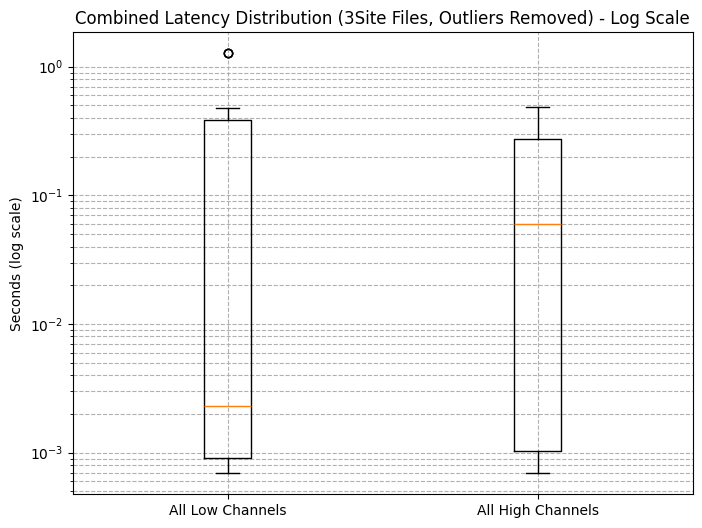

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

filename1Site = '1Site/new_test.txt'
filename3Site1 = '3Site/latency_metrics_dispatcher_1_2.txt'
filename3Site2 = '3Site/latency_metrics_dispatcher_2_2.txt'
filename3Site3 = '3Site/latency_metrics_dispatcher_3_2.txt'

# Lists to hold data for low and high channels
low_data = []
high_data = []

pattern = re.compile(r'Latency in (.+?): ([0-9.]+) seconds')

with open(filename1Site, 'r') as f:
    for line in f:
        match = pattern.search(line)
        if match:
            channel = match.group(1)
            latency = float(match.group(2))
            
            if 'high' in channel:
                high_data.append({'channel': channel, 'seconds': latency})
            elif 'low' in channel:
                low_data.append({'channel': channel, 'seconds': latency})

# Create DataFrames
low = pd.DataFrame(low_data)
high = pd.DataFrame(high_data)



data = [low['seconds'], high['seconds']]

plt.figure(figsize=(8, 6))
plt.boxplot(data, tick_labels=['All Low Channels', 'All High Channels'])
plt.yscale('log')  # Log scale on y-axis
plt.title('Combined Latency Distribution (3Site Files, Outliers Removed) - Log Scale')
plt.ylabel('Seconds (log scale)')
plt.grid(True, which="both", ls="--")
plt.show()




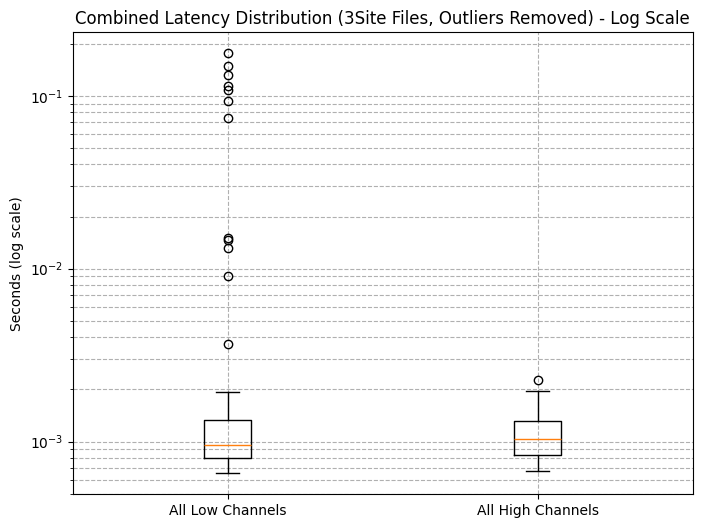

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt

pattern = re.compile(r'Latency in (.+?): ([0-9.]+) seconds')

def extract_latency_data(filename):
    low_data = []
    high_data = []
    with open(filename, 'r') as f:
        for line in f:
            match = pattern.search(line)
            if match:
                channel = match.group(1)
                latency = float(match.group(2))
                if 'high' in channel:
                    high_data.append(latency)
                elif 'low' in channel:
                    low_data.append(latency)
    return low_data, high_data

def remove_outliers(data):
    if not data:
        return data
    q1 = pd.Series(data).quantile(0.25)
    q3 = pd.Series(data).quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return [x for x in data if lower_bound <= x <= upper_bound]

filename3Site1 = '3Site/latency_metrics_dispatcher_1_2.txt'
filename3Site2 = '3Site/latency_metrics_dispatcher_2_2.txt'
filename3Site3 = '3Site/latency_metrics_dispatcher_3_2.txt'

# Extract data
low1, high1 = extract_latency_data(filename3Site1)
low2, high2 = extract_latency_data(filename3Site2)
low3, high3 = extract_latency_data(filename3Site3)

# Remove outliers individually
low1 = remove_outliers(low1)
high1 = remove_outliers(high1)
low2 = remove_outliers(low2)
high2 = remove_outliers(high2)
low3 = remove_outliers(low3)
high3 = remove_outliers(high3)

# Combine filtered data
all_low = low1 + low2 + low3
all_high = high1 + high2 + high3

data = [all_low, all_high]

plt.figure(figsize=(8, 6))
plt.boxplot(data, tick_labels=['All Low Channels', 'All High Channels'])
plt.title('Combined Latency Distribution (3Site Files, Outliers Removed)')
plt.ylabel('Seconds')
plt.grid(True)
plt.show()


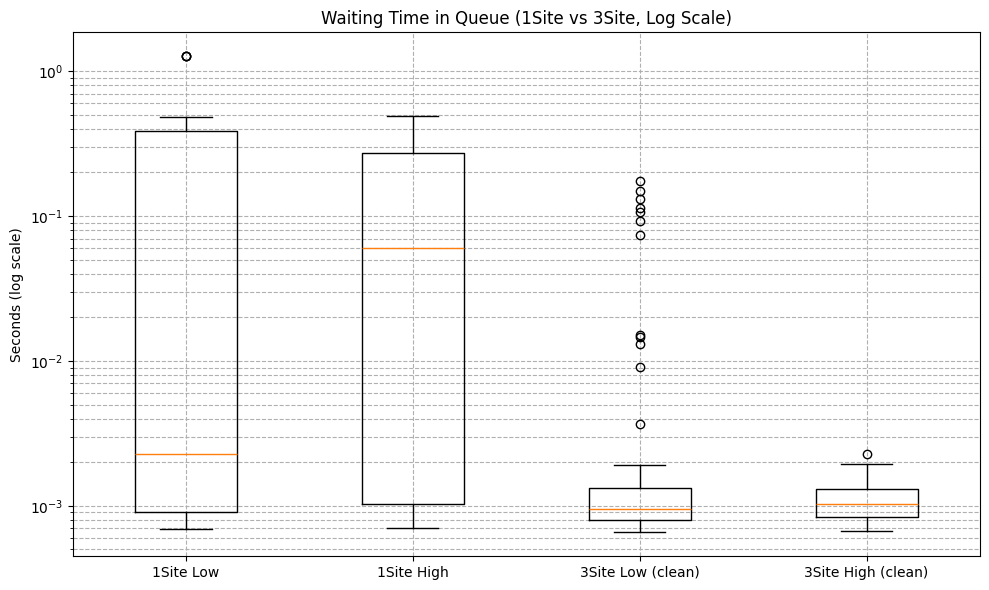

In [17]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Regex pattern for parsing
pattern = re.compile(r'Latency in (.+?): ([0-9.]+) seconds')

# === PART 1: Load 1Site data ===
filename1Site = '1Site/new_test.txt'
low_data_1site = []
high_data_1site = []

with open(filename1Site, 'r') as f:
    for line in f:
        match = pattern.search(line)
        if match:
            channel = match.group(1)
            latency = float(match.group(2))
            if 'high' in channel:
                high_data_1site.append(latency)
            elif 'low' in channel:
                low_data_1site.append(latency)

# === PART 2: Load and clean 3Site data ===
def extract_latency_data(filename):
    low_data = []
    high_data = []
    with open(filename, 'r') as f:
        for line in f:
            match = pattern.search(line)
            if match:
                channel = match.group(1)
                latency = float(match.group(2))
                if 'high' in channel:
                    high_data.append(latency)
                elif 'low' in channel:
                    low_data.append(latency)
    return low_data, high_data

def remove_outliers(data):
    if not data:
        return data
    q1 = pd.Series(data).quantile(0.25)
    q3 = pd.Series(data).quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return [x for x in data if lower_bound <= x <= upper_bound]

# Load 3Site data
files_3site = [
    '3Site/latency_metrics_dispatcher_1_2.txt',
    '3Site/latency_metrics_dispatcher_2_2.txt',
    '3Site/latency_metrics_dispatcher_3_2.txt'
]

all_low_3site = []
all_high_3site = []

for file in files_3site:
    low, high = extract_latency_data(file)
    all_low_3site += remove_outliers(low)
    all_high_3site += remove_outliers(high)

# === PART 3: Combine all into one boxplot ===
data = [
    low_data_1site,
    high_data_1site,
    all_low_3site,
    all_high_3site
]

labels = [
    '1Site Low',
    '1Site High',
    '3Site Low (clean)',
    '3Site High (clean)'
]

plt.figure(figsize=(10, 6))
plt.boxplot(data, tick_labels=labels)
plt.yscale('log')
plt.title('Waiting Time in Queue Without Outliers(1Site vs 3Site, Log Scale)')
plt.ylabel('Seconds (log scale)')
plt.grid(True, which="both", ls="--")
plt.tight_layout()

# Save the plot before showing
plt.savefig('WaitingTimeQueue.png', dpi=300, bbox_inches='tight')

plt.show()


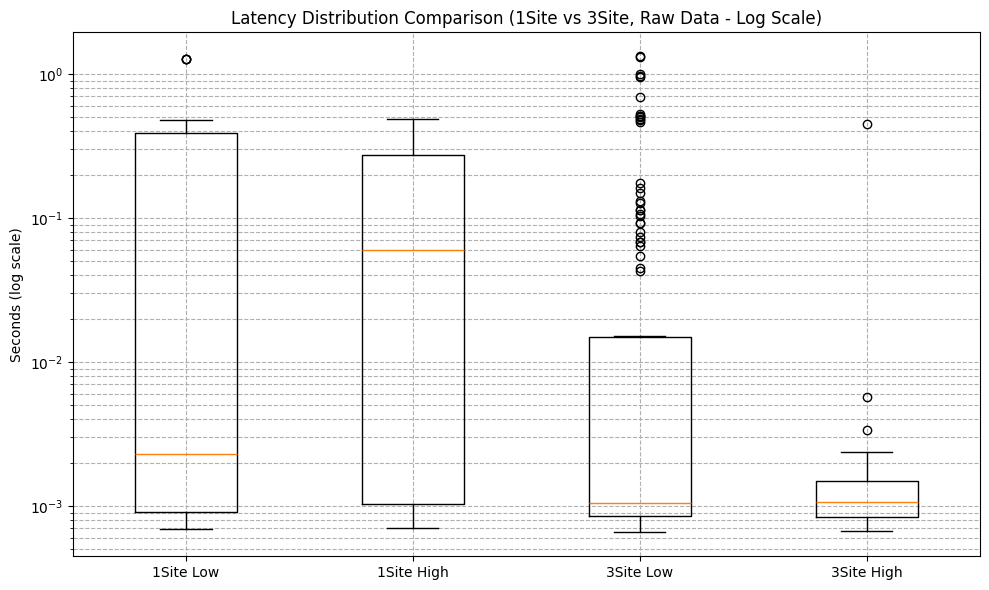

In [16]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Regex pattern to extract latency data
pattern = re.compile(r'Latency in (.+?): ([0-9.]+) seconds')

# === Extract latency from a single file ===
def extract_latency_data(filename):
    low_data = []
    high_data = []
    with open(filename, 'r') as f:
        for line in f:
            match = pattern.search(line)
            if match:
                channel = match.group(1)
                latency = float(match.group(2))
                if 'high' in channel:
                    high_data.append(latency)
                elif 'low' in channel:
                    low_data.append(latency)
    return low_data, high_data

# === 1Site data ===
filename1Site = '1Site/new_test.txt'
low_1site, high_1site = extract_latency_data(filename1Site)

# === 3Site data ===
files_3site = [
    '3Site/latency_metrics_dispatcher_1_2.txt',
    '3Site/latency_metrics_dispatcher_2_2.txt',
    '3Site/latency_metrics_dispatcher_3_2.txt'
]

all_low_3site = []
all_high_3site = []

for file in files_3site:
    low, high = extract_latency_data(file)
    all_low_3site += low
    all_high_3site += high

# === Combine all into one boxplot ===
data = [
    low_1site,
    high_1site,
    all_low_3site,
    all_high_3site
]

labels = [
    '1Site Low',
    '1Site High',
    '3Site Low',
    '3Site High'
]

# === Plot ===
plt.figure(figsize=(10, 6))
plt.boxplot(data, tick_labels=labels)
plt.yscale('log')
plt.title('Latency Distribution Comparison (1Site vs 3Site, Raw Data - Log Scale)')
plt.ylabel('Seconds (log scale)')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()
